# Лабораторная работа №5
## Изучение моделей классификации и регрессии.
## Задание

### Изучение load_diabetes

In [17]:
# Подключение библиотек
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import mglearn
import mglearn.datasets
import seaborn as sns


In [5]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()

print("Ключи diabetes(): \n{}".format(diabetes.keys()))


Ключи diabetes(): 
dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])


In [6]:
print("Форма массива data для набора diabetes: {}".format(diabetes.data.shape))

Форма массива data для набора diabetes: (442, 10)


In [10]:
target = diabetes['target']
target

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [11]:
data = diabetes['data']
data

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06833155, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286131, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04688253,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452873, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00422151,  0.00306441]])

In [14]:
# Преобразование данных в DataFrame
diabetes_df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
# Добавление целевых значений в DataFrame
diabetes_df['target'] = diabetes.target
diabetes_df.head(10)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
5,-0.092695,-0.044642,-0.040696,-0.019442,-0.068991,-0.079288,0.041277,-0.076395,-0.041176,-0.096346,97.0
6,-0.045472,0.050680,-0.047163,-0.015999,-0.040096,-0.024800,0.000779,-0.039493,-0.062917,-0.038357,138.0
7,0.063504,0.050680,-0.001895,0.066629,0.090620,0.108914,0.022869,0.017703,-0.035816,0.003064,63.0
8,0.041708,0.050680,0.061696,-0.040099,-0.013953,0.006202,-0.028674,-0.002592,-0.014960,0.011349,110.0
9,-0.070900,-0.044642,0.039062,-0.033213,-0.012577,-0.034508,-0.024993,-0.002592,0.067737,-0.013504,310.0


In [13]:
diabetes.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

* 'age': Возраст пациента.
* 'sex': Пол пациента (1 - мужской, 0 - женский).
* 'bmi': Индекс массы тела (Body Mass Index) пациента.
* 'bp': Среднее кровяное давление пациента.
* 's1', 's2', 's3', 's4', 's5', 's6': Различные биомедицинские показатели, такие как уровень сыворотки в плазме, которые могут быть связаны с диабетом.

In [15]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


In [16]:
diabetes_df.isnull()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
437,False,False,False,False,False,False,False,False,False,False,False
438,False,False,False,False,False,False,False,False,False,False,False
439,False,False,False,False,False,False,False,False,False,False,False
440,False,False,False,False,False,False,False,False,False,False,False


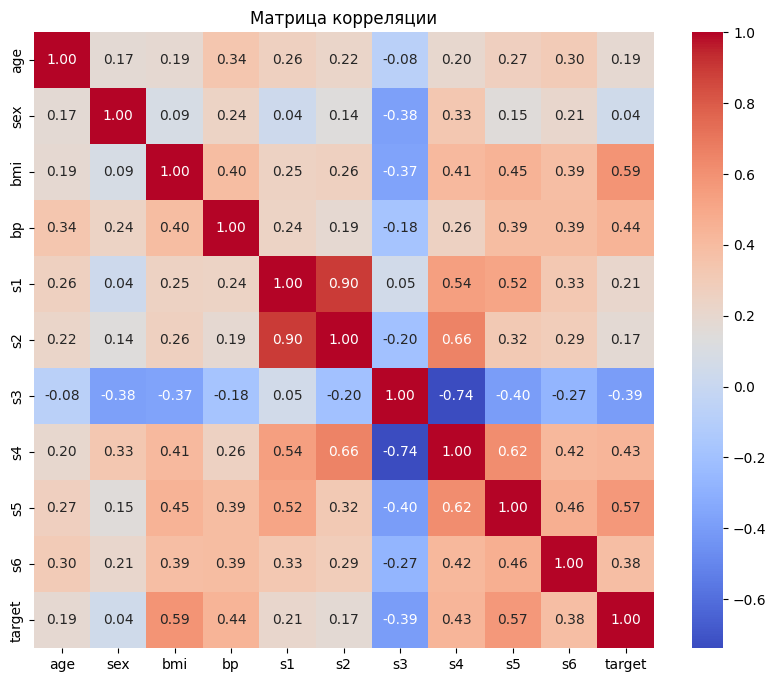

In [18]:
correlation_matrix = diabetes_df.corr()

# Создаем тепловую карту
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Матрица корреляции")
plt.show()

In [26]:
#KNeighborsRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
X, y = diabetes.data, diabetes.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

reg1 = KNeighborsRegressor(n_neighbors=1)
reg1.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=1)

In [29]:
reg3 = KNeighborsRegressor(n_neighbors=3)
reg3.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=3)

In [30]:
print("Прогнозы для тестового набора: \n{}".format(reg1.predict(X_test)))

Прогнозы для тестового набора: 
[336. 220. 118.  97. 293. 275.  96. 237.  95. 310. 182. 122. 178.  77.
 332.  43.  68.  63.  99. 268. 252.  88. 225. 210. 229. 262. 170.  48.
 166. 122. 237.  42. 185. 206.  67.  66. 174.  77.  88. 109. 128. 107.
 262. 265. 122.  65. 148. 113.  51. 296. 225.  72. 216. 111. 280. 181.
 121. 150.  67. 237. 310.  25. 140. 111. 265. 113.  31. 306. 229.  72.
  84. 202.  53. 141. 187. 107. 116. 272. 332.  67.  67. 164.  52. 311.
  94. 153. 129. 126.  94.  65.  85.  47.  52. 237.  79. 148. 232. 261.
  83.  97.  66. 143. 241.  73. 275.  80. 306. 242. 144.  53. 129.]


In [31]:
print("Прогнозы для тестового набора: \n{}".format(reg3.predict(X_test)))

Прогнозы для тестового набора: 
[247.33333333 181.66666667 158.33333333 116.66666667 185.66666667
 222.66666667  81.         218.66666667 163.         270.33333333
 167.66666667 197.66666667 133.33333333  68.33333333 294.
  60.         132.33333333  70.33333333 123.         249.66666667
 207.33333333 155.33333333 167.         108.66666667 203.
 190.33333333 101.66666667  65.33333333 189.33333333 186.33333333
 229.          63.66666667 176.33333333 222.          88.66666667
 161.66666667 190.33333333 110.66666667 118.33333333 161.33333333
 157.         155.33333333 151.66666667 206.66666667 145.
  66.66666667 118.33333333 100.66666667 140.33333333 219.
 116.33333333  77.         204.33333333 124.         275.33333333
 136.66666667 145.66666667 111.33333333 110.66666667 215.33333333
 178.33333333  89.33333333 135.         113.         270.66666667
 162.66666667  57.66666667 284.33333333 196.          84.33333333
 131.33333333 169.33333333  80.         110.33333333 166.33333333
 126.33333

In [33]:
print(f"{reg3.score(X_test,y_test)}")

0.1475311393015417


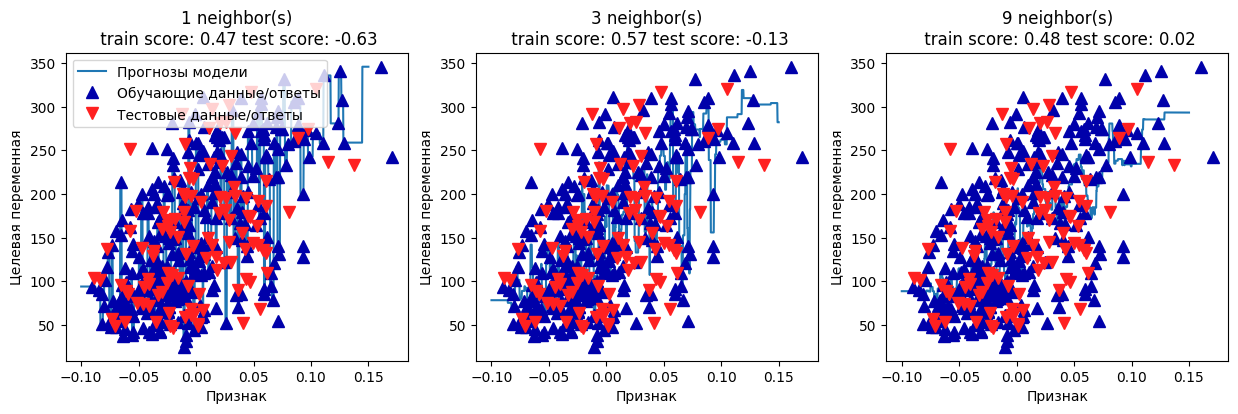

In [38]:
X_train, X_test, y_train, y_test = train_test_split(
    diabetes.data[:, 2:3], diabetes.target, random_state=0)
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
# создаем 1000 точек данных, равномерно распределенных между -3 и 3
line = np.linspace(-0.1, 0.15, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes):
 # получаем прогнозы, используя 1, 3, и 9 соседей
 reg = KNeighborsRegressor(n_neighbors=n_neighbors)
 reg.fit(X_train, y_train)
 ax.plot(line, reg.predict(line))
 ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
 ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)

 ax.set_title(
 "{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format(
 n_neighbors, reg.score(X_train, y_train),
 reg.score(X_test, y_test)))
 ax.set_xlabel("Признак")
 ax.set_ylabel("Целевая переменная")
axes[0].legend(["Прогнозы модели", "Обучающие данные/ответы",
 "Тестовые данные/ответы"], loc="best")

In [39]:
# LinearRegression
from sklearn.linear_model import LinearRegression
lr = LinearRegression().fit(X_train, y_train)

In [40]:
print("lr.coef_:{}".format(lr.coef_))
print("lr.intercept_:{}".format(lr.intercept_))

lr.coef_:[1016.92353894]
lr.intercept_:153.2256898080056


In [42]:
print("правильность на обучающем наборе: {:.2f}".format(lr.score(X_train,y_train)))
print("правильность на тестовом наборе: {:.2f}".format(lr.score(X_test,y_test)))

правильность на обучающем наборе: 0.39
правильность на тестовом наборе: 0.16


In [43]:
#Ridge
from sklearn.linear_model import Ridge
X = diabetes.data  
y = diabetes.target

X_train,X_test, y_train, y_test = train_test_split(X,y,random_state=0)
ridge = Ridge().fit(X_train, y_train)
print(f"Правильность на обучающем наборе :{ridge.score(X_train, y_train)}")
print(f"Правильность на тестовом наборе :{ridge.score(X_test, y_test)}")

Правильность на обучающем наборе :0.4625420370188341
Правильность на тестовом наборе :0.3569596077458861


In [46]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("правильность на обучающем наборе: {:.2f}".format(ridge10.score(X_train,y_train)))
print("правильность на тестовом наборе: {:.2f}".format(ridge10.score(X_test,y_test)))

правильность на обучающем наборе: 0.17
правильность на тестовом наборе: 0.14


In [45]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("правильность на обучающем наборе: {:.2f}".format(ridge01.score(X_train,y_train)))
print("правильность на тестовом наборе: {:.2f}".format(ridge01.score(X_test,y_test)))

правильность на обучающем наборе: 0.55
правильность на тестовом наборе: 0.37


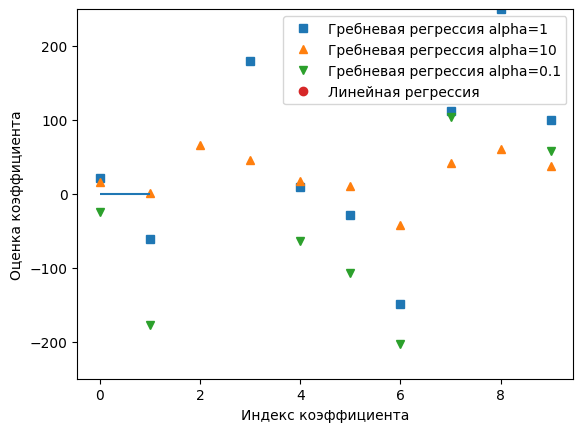

In [51]:
plt.plot(ridge.coef_, 's', label="Гребневая регрессия alpha=1")
plt.plot(ridge10.coef_, '^', label="Гребневая регрессия alpha=10")
plt.plot(ridge01.coef_, 'v', label="Гребневая регрессия alpha=0.1")
plt.plot(lr.coef_, 'o', label="Линейная регрессия")
plt.xlabel("Индекс коэффициента")
plt.ylabel("Оценка коэффициента")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-250, 250)
plt.legend()

In [52]:
#Lasso
from sklearn.linear_model import Lasso
lasso = Lasso().fit(X_train, y_train)
print("правильность на обучающем наборе: {:.2f}".format(lasso.score(X_train,y_train)))
print("правильность на тестовом наборе: {:.2f}".format(lasso.score(X_test,y_test)))   
print("количество использованных признаков: {}".format(np.sum(lasso.coef_ != 0)))

правильность на обучающем наборе: 0.41
правильность на тестовом наборе: 0.28
количество использованных признаков: 2


In [53]:
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("правильность на обучающем наборе: {:.2f}".format(lasso001.score(X_train,y_train)))
print("правильность на тестовом наборе: {:.2f}".format(lasso001.score(X_test,y_test)))   
print("количество использованных признаков: {}".format(np.sum(lasso001.coef_ != 0)))

правильность на обучающем наборе: 0.55
правильность на тестовом наборе: 0.35
количество использованных признаков: 9


In [54]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("правильность на обучающем наборе: {:.2f}".format(lasso00001.score(X_train,y_train)))
print("правильность на тестовом наборе: {:.2f}".format(lasso00001.score(X_test,y_test)))   
print("количество использованных признаков: {}".format(np.sum(lasso00001.coef_ != 0)))

правильность на обучающем наборе: 0.56
правильность на тестовом наборе: 0.36
количество использованных признаков: 10


Text(0, 0.5, 'Оценка коэффициента')

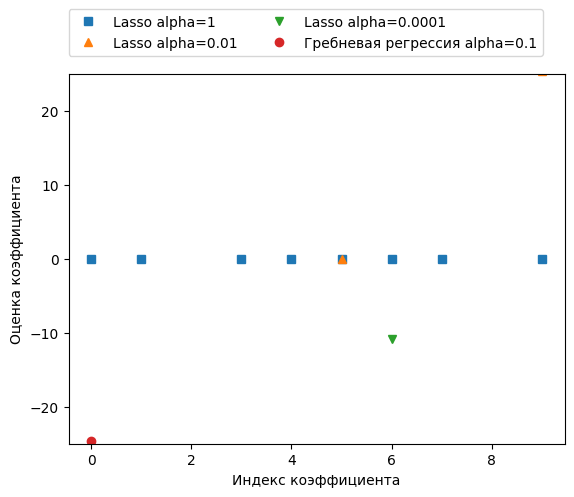

In [55]:
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")
plt.plot(ridge01.coef_, 'o', label="Гребневая регрессия alpha=0.1")
plt.legend(ncol=2,loc=(0,1.05))
plt.ylim(-25,25)
plt.xlabel("Индекс коэффициента")
plt.ylabel("Оценка коэффициента")

In [56]:
# LogisticRegression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression().fit(X_train, y_train)
print("правильность на обучающем наборе:{:.3f}".format(logreg.score(X_train, y_train)))
print("правильность на тестовом наборе:{:.3f}".format(logreg.score(X_test, y_test)))

правильность на обучающем наборе:0.033
правильность на тестовом наборе:0.009


In [57]:
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
print("правильность на обучающем наборе:{:.3f}".format(logreg100.score(X_train, y_train)))
print("правильность на тестовом наборе:{:.3f}".format(logreg100.score(X_test, y_test)))

правильность на обучающем наборе:0.178
правильность на тестовом наборе:0.009


In [58]:
logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)
print("правильность на обучающем наборе:{:.3f}".format(logreg001.score(X_train, y_train)))
print("правильность на тестовом наборе:{:.3f}".format(logreg001.score(X_test, y_test)))

правильность на обучающем наборе:0.030
правильность на тестовом наборе:0.009


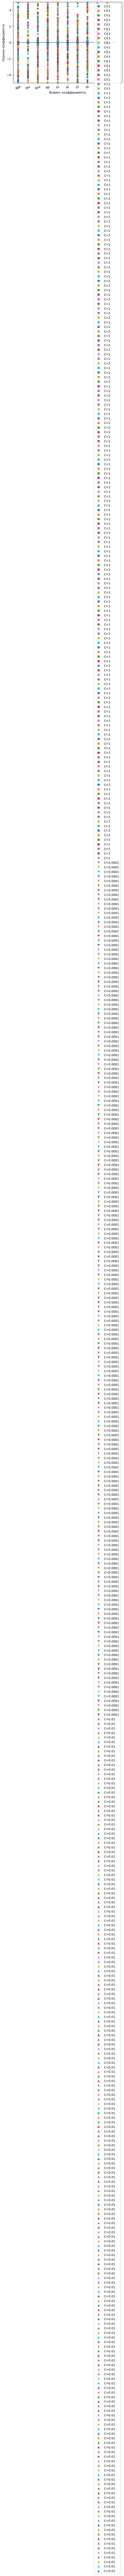

In [76]:
plt.plot(logreg.coef_.T, 's', label="C=1")
plt.plot(logreg100.coef_.T, 'v', label="C=0.0001")
plt.plot(logreg001.coef_.T, '^', label="C=0.01")
plt.xticks(range(diabetes.data.shape[1]),diabetes.feature_names, rotation=20)
plt.hlines(0,0,diabetes.data.shape[1])
plt.ylim(-5,5)
plt.xlabel("Индекс коэффициента")
plt.ylabel("Оценка коэффициента")
plt.legend()

# Задание №2
## Изучение набор данных linnerud .

In [77]:
from sklearn.datasets import load_linnerud
linnerud = load_linnerud()
print("Ключи linnerud(): \n{}".format(linnerud.keys()))

Ключи linnerud(): 
dict_keys(['data', 'feature_names', 'target', 'target_names', 'frame', 'DESCR', 'data_filename', 'target_filename', 'data_module'])


In [78]:
target = pd.DataFrame(data=linnerud.target.reshape(-1, 1), columns=['target'])

# Создайте DataFrame для данных
data = pd.DataFrame(data=linnerud.data, columns=linnerud.feature_names)

# Объедините данные
full_data = pd.concat([data, target], axis=1)
full_data

,Chins,Situps,Jumps,target
0,5.0,162.0,60.0,191.0
1,2.0,110.0,60.0,36.0
2,12.0,101.0,101.0,50.0
3,12.0,105.0,37.0,189.0
4,13.0,155.0,58.0,37.0
5,4.0,101.0,42.0,52.0
6,8.0,101.0,38.0,193.0
7,6.0,125.0,40.0,38.0
8,15.0,200.0,40.0,58.0
9,17.0,251.0,250.0,162.0


In [79]:
print("Форма массива data для набора linnerud: {}".format(linnerud.data.shape))

Форма массива data для набора linnerud: (20, 3)


In [81]:
print("Имена признаков:\n{}".format(linnerud.feature_names))

Имена признаков:
['Chins', 'Situps', 'Jumps']


In [82]:
print(linnerud["DESCR"] [:1000] + '/n....')

.. _linnerrud_dataset:

Linnerrud dataset
-----------------

**Data Set Characteristics:**

    :Number of Instances: 20
    :Number of Attributes: 3
    :Missing Attribute Values: None

The Linnerud dataset is a multi-output regression dataset. It consists of three
exercise (data) and three physiological (target) variables collected from
twenty middle-aged men in a fitness club:

- *physiological* - CSV containing 20 observations on 3 physiological variables:
   Weight, Waist and Pulse.
- *exercise* - CSV containing 20 observations on 3 exercise variables:
   Chins, Situps and Jumps.

|details-start|
**References**
|details-split|

* Tenenhaus, M. (1998). La regression PLS: theorie et pratique. Paris:
  Editions Technic.

|details-end|/n....


In [83]:
linnerud_data = pd.DataFrame(linnerud.data, columns=linnerud.target_names)
linnerud_data.head()

,Weight,Waist,Pulse
0,5.0,162.0,60.0
1,2.0,110.0,60.0
2,12.0,101.0,101.0
3,12.0,105.0,37.0
4,13.0,155.0,58.0


In [87]:
from sklearn.neighbors import KNeighborsRegressor

# Инициализация и обучение модели KNeighborsRegressor
knn = KNeighborsRegressor().fit(X_train, y_train)

# Оценка R^2 на тренировочных и тестовых данных
train_r2_knn = knn.score(X_train, y_train)
test_r2_knn = knn.score(X_test, y_test)
print(f"R^2 на тренировочных данных (KNeighborsRegressor): {train_r2_knn}")
print(f"R^2 на тестовых данных (KNeighborsRegressor): {test_r2_knn}")

R^2 на тренировочных данных (KNeighborsRegressor): 0.31637546805196554
R^2 на тестовых данных (KNeighborsRegressor): -0.41066887575969796


In [88]:
# LinearRegression
from sklearn.linear_model import LinearRegression

# Инициализация и обучение модели Linear Regression
lrr = LinearRegression().fit(X_train, y_train)

# Вывод коэффициентов и пересечений для каждого признака
print(f"lr.coef: {lrr.coef_}")
print(f"lr.intercept: {lrr.intercept_}")

# Оценка R^2 на тренировочных и тестовых данных
train_r2 = lrr.score(X_train, y_train)
test_r2 = lrr.score(X_test, y_test)
print(f"R^2 на тренировочных данных: {train_r2}")
print(f"R^2 на тестовых данных: {test_r2}")


lr.coef: [[-2.55388075e+00 -1.87334813e-01  1.55632934e-01]
 [-3.25317265e-01 -3.72155297e-02  3.22483661e-02]
 [ 4.66624875e-01 -3.84735037e-03 -2.35434971e-03]]
lr.intercept: [221.27779424  41.8405461   51.37162613]
R^2 на тренировочных данных: 0.38175040527117715
R^2 на тестовых данных: -1.2403350204169168


In [89]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# Инициализация модели Ridge
ridge = Ridge()

# Определение сетки параметров для GridSearchCV
param_grid = {
    'alpha': [0.1, 1, 10]
}

# Поиск наилучших параметров с использованием GridSearchCV
grid_search = GridSearchCV(ridge, param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(), param_grid={'alpha': [0.1, 1, 10]})

In [90]:
# Получение наилучшей модели и вывод наилучших параметров
best_ridge = grid_search.best_estimator_
print(f"Наилучшие параметры Ridge: {grid_search.best_params_}")

Наилучшие параметры Ridge: {'alpha': 10}


In [91]:
# Оценка R^2 на тренировочных и тестовых данных
train_r2_ridge = best_ridge.score(X_train, y_train)
test_r2_ridge = best_ridge.score(X_test, y_test)
print(f"R^2 на тренировочных данных (Ridge): {train_r2_ridge}")
print(f"R^2 на тестовых данных (Ridge): {test_r2_ridge}")

R^2 на тренировочных данных (Ridge): 0.38126956599533407
R^2 на тестовых данных (Ridge): -1.1296757845744692


In [92]:
#Lasso
from sklearn.linear_model import Lasso
lasso = Lasso()  
lasso.fit(X_train, y_train)

print(f"Правильность на обучающем наборе: {lasso.score(X_train, y_train)}")
print(f"Правильность на тестовом наборе: {lasso.score(X_test, y_test)}")
print(f"Количество использованных признаков: {np.sum(lasso.coef_ != 0)}")

Правильность на обучающем наборе: 0.3759355183509383
Правильность на тестовом наборе: -0.9829492757017896
Количество использованных признаков: 9


In [93]:
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("правильность на обучающем наборе: {:.2f}".format(lasso001.score(X_train,y_train)))
print("правильность на тестовом наборе: {:.2f}".format(lasso001.score(X_test,y_test)))   
print("количество использованных признаков: {}".format(np.sum(lasso001.coef_ != 0)))

правильность на обучающем наборе: 0.38
правильность на тестовом наборе: -1.24
количество использованных признаков: 9


In [94]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("правильность на обучающем наборе: {:.2f}".format(lasso00001.score(X_train,y_train)))
print("правильность на тестовом наборе: {:.2f}".format(lasso00001.score(X_test,y_test)))   
print("количество использованных признаков: {}".format(np.sum(lasso00001.coef_ != 0)))

правильность на обучающем наборе: 0.38
правильность на тестовом наборе: -1.24
количество использованных признаков: 9


Text(0, 0.5, 'Оценка коэффициента')

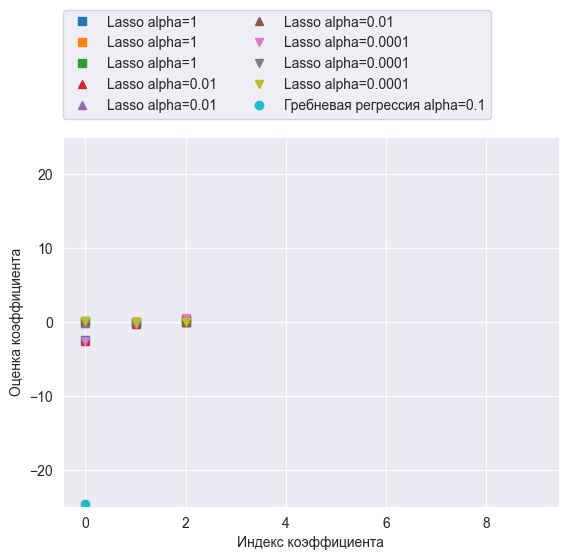

In [95]:
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")
plt.plot(ridge01.coef_, 'o', label="Гребневая регрессия alpha=0.1")
plt.legend(ncol=2,loc=(0,1.05))
plt.ylim(-25,25)
plt.xlabel("Индекс коэффициента")
plt.ylabel("Оценка коэффициента")

In [108]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Выбираем первый столбец из массива y в качестве целевой переменной
y_1d = y[:, 0]

# Разделяем данные на тренировочный и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y_1d, test_size=0.2, random_state=42)

# Создаем и обучаем модель логистической регрессии
logreg = LogisticRegression(max_iter=100000)
logreg.fit(X_train, y_train)

# Оценка точности на тренировочных и тестовых данных
train_accuracy = logreg.score(X_train, y_train)
test_accuracy = logreg.score(X_test, y_test)

print("правильность на обучающем наборе:{:.3f}".format(logreg.score(X_train, y_train)))
print("правильность на тестовом наборе:{:.3f}".format(logreg.score(X_test, y_test)))


правильность на обучающем наборе:1.000
правильность на тестовом наборе:0.000


In [109]:
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
print("правильность на обучающем наборе:{:.3f}".format(logreg100.score(X_train, y_train)))
print("правильность на тестовом наборе:{:.3f}".format(logreg100.score(X_test, y_test)))

правильность на обучающем наборе:0.812
правильность на тестовом наборе:0.000


C:\Users\user\PycharmProjects\BigData\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [110]:
logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)
print("правильность на обучающем наборе:{:.3f}".format(logreg001.score(X_train, y_train)))
print("правильность на тестовом наборе:{:.3f}".format(logreg001.score(X_test, y_test)))

правильность на обучающем наборе:0.500
правильность на тестовом наборе:0.000


C:\Users\user\PycharmProjects\BigData\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


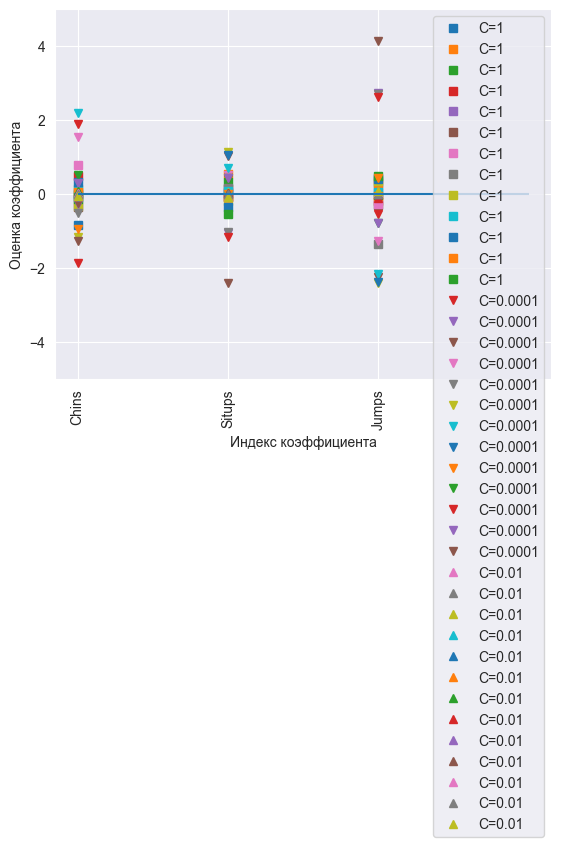

In [111]:
plt.plot(logreg.coef_.T, 's', label="C=1")
plt.plot(logreg100.coef_.T, 'v', label="C=0.0001")
plt.plot(logreg001.coef_.T, '^', label="C=0.01")
plt.xticks(range(linnerud.data.shape[1]),linnerud.feature_names, rotation=90)
plt.hlines(0,0,linnerud.data.shape[1])
plt.ylim(-5,5)
plt.xlabel("Индекс коэффициента")
plt.ylabel("Оценка коэффициента")
plt.legend()